In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from tqdm import tqdm

%matplotlib inline

df = pd.read_csv('datasets/avy_X-y.csv', index_col='Unnamed: 0')

In [2]:
print(df.columns)
print(len(df))
df.count()

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure', 'above', 'below', 'discussion', 'near', 'storm_slabs',
       'wet_slabs', 'persistent', 'wind_slab', 'loose_wet', 'glide',
       'cornices', 'loose_dry'],
      dtype='object')
28096


Temperature_m               28096
Relative_Humidity_m         28096
Temperature_tl              28096
Relative_Humidity_tl        28096
Wind_Speed_Average_tl       28096
Wind_Speed_Maximum_tl       28096
Wind_Direction_(deg.)_tl    28096
precip                      28096
depth                       28096
pressure                    28096
above                        9911
below                        9911
discussion                   9911
near                         9911
storm_slabs                  9911
wet_slabs                    9911
persistent                   9911
wind_slab                    9911
loose_wet                    9911
glide                        9911
cornices                     9911
loose_dry                    9911
dtype: int64

In [3]:
df.describe()

Temperature_m  Relative_Humidity_m  Temperature_tl  \
count   28096.000000         28096.000000    28096.000000   
mean       41.340654            69.038744       40.459413   
std        14.186632            24.548847       14.506174   
min         3.229000             4.673000        5.743000   
25%        30.880000            48.297500       29.200000   
50%        39.380000            76.020000       37.900000   
75%        50.840000            91.900000       51.082500   
max        86.800000           100.000000       85.000000   

       Relative_Humidity_tl  Wind_Speed_Average_tl  Wind_Speed_Maximum_tl  \
count          28096.000000           28096.000000           28096.000000   
mean              71.808071               5.993168              13.217519   
std               28.415366               4.858733               8.173173   
min                4.038000              -0.036000               0.000000   
25%               46.807500               1.494000               7.160000   
50%               82.500000               5.574000              12.960000   
75%               99.400000               9.330000              18.380000   
max              100.000000              41.900000              72.800000   

       Wind_Direction_(deg.)_tl        precip         depth      pressure  \
count              28096.000000  28096.000000  28096.000000  28096.000000   
mean                 232.426810      0.010876     35.254139   1016.176392   
std                  106.077977      0.034138     42.249978      6.085565   
min                    0.005000      0.000000      0.000000    990.000000   
25%                  106.100000      0.000000      2.905000   1013.212000   
50%                  286.700000      0.000000     11.260000   1017.278000   
75%                  310.500000      0.000000     69.300000   1020.180000   
max                  360.000000      0.740000    143.700000   1034.949000   

          ...             below         near  storm_slabs    wet_slabs  \
count     ...       9911.000000  9911.000000  9911.000000  9911.000000   
mean      ...          1.932926     2.332011     0.453088     0.031480   
std       ...          0.698447     0.704180     0.451705     0.152445   
min       ...          1.000000     1.000000     0.000000     0.000000   
25%       ...          1.291667     2.000000     0.000000     0.000000   
50%       ...          2.000000     2.041667     0.333333     0.000000   
75%       ...          2.125000     3.000000     1.000000     0.000000   
max       ...          5.000000     5.000000     1.000000     1.000000   

       persistent    wind_slab    loose_wet        glide     cornices  \
count  9911.00000  9911.000000  9911.000000  9911.000000  9911.000000   
mean      0.05212     0.802341     0.525207     0.008532     0.163998   
std       0.19421     0.378235     0.465231     0.085119     0.354426   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     1.000000     0.000000     0.000000     0.000000   
50%       0.00000     1.000000     0.625000     0.000000     0.000000   
75%       0.00000     1.000000     1.000000     0.000000     0.000000   
max       1.00000     1.000000     1.000000     1.000000     1.000000   

         loose_dry  
count  9911.000000  
mean      0.036374  
std       0.171454  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

In [4]:
df.index

Index(['2014-09-23 09:00:00', '2014-09-23 10:00:00', '2014-09-23 11:00:00',
       '2014-09-23 12:00:00', '2014-09-23 13:00:00', '2014-09-23 14:00:00',
       '2014-09-23 15:00:00', '2014-09-23 16:00:00', '2014-09-23 17:00:00',
       '2014-09-23 18:00:00',
       ...
       '2017-12-08 03:00:00', '2017-12-08 04:00:00', '2017-12-08 05:00:00',
       '2017-12-08 06:00:00', '2017-12-08 07:00:00', '2017-12-08 08:00:00',
       '2017-12-08 09:00:00', '2017-12-08 10:00:00', '2017-12-08 11:00:00',
       '2017-12-08 12:00:00'],
      dtype='object', length=28096)

### Prediction 1:
# Storm Slab

### Storm slab is formed during storms and tends to stabilize very quickly (~3 days after snowfall typical; definitely should resolve within a week)

y = NWAC's forecast of storm slab: 0 or 1 at time T
X = weather conditions, 5 days prior to T 
_possible revision to model: 5 days before and up to 24 hours after (because NWAC may predict storm slab as a hazard when a storm is coming in in the afternoon) - see if this is relevant_

In [5]:
y_all = df.storm_slabs   # np.npdarray 

In [6]:
# some relevant methods for manipluating y

print(y_all.values.shape)
print(y_all.count())
print(y_all.iloc[:5].isna())
print('...')
print(y_all.iloc[-5:].isna())
print()
y_ok = y_all[~y_all.isna()]
print('y_ok.__len__() =', len(y_ok))

(28096,)
9911
2014-09-23 09:00:00    True
2014-09-23 10:00:00    True
2014-09-23 11:00:00    True
2014-09-23 12:00:00    True
2014-09-23 13:00:00    True
Name: storm_slabs, dtype: bool
...
2017-12-08 08:00:00    False
2017-12-08 09:00:00    False
2017-12-08 10:00:00    False
2017-12-08 11:00:00    False
2017-12-08 12:00:00    False
Name: storm_slabs, dtype: bool

y_ok.__len__() = 9911


In [7]:
df.precip = df.precip.apply(lambda x: x*100)   # bring precip up to same scale approximately

In [62]:
cols = ['Temperature_m', 'Wind_Speed_Average_tl', 'precip', 'Relative_Humidity_m', 'depth', 'Wind_Speed_Maximum_tl'] 
# cols to use

data = df[cols]
       
# DNU   'depth','Temperature_tl', 'Wind_Speed_Maximum_tl',
       #'above', 'below', 'near', 'storm_slabs', 'wet_slabs', 'Relative_Humidity_m',
       #'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       #'loose_dry', 'Relative_Humidity_tl',  'Wind_Direction_(deg.)_tl',]

In [63]:
data.corr()
# wind_speed average and maximum are 94% correlated so drop maximum.
# temperature tl and m are also eqivalent

Temperature_m  Wind_Speed_Average_tl    precip  \
Temperature_m               1.000000              -0.223283 -0.174584   
Wind_Speed_Average_tl      -0.223283               1.000000  0.251907   
precip                     -0.174584               0.251907  1.000000   
Relative_Humidity_m        -0.708040               0.176858  0.332055   
depth                      -0.420301               0.040877  0.060287   
Wind_Speed_Maximum_tl      -0.243146               0.946514  0.290814   

                       Relative_Humidity_m     depth  Wind_Speed_Maximum_tl  
Temperature_m                    -0.708040 -0.420301              -0.243146  
Wind_Speed_Average_tl             0.176858  0.040877               0.946514  
precip                            0.332055  0.060287               0.290814  
Relative_Humidity_m               1.000000  0.254458               0.209519  
depth                             0.254458  1.000000               0.061801  
Wind_Speed_Maximum_tl             0.209519  0.061801               1.000000

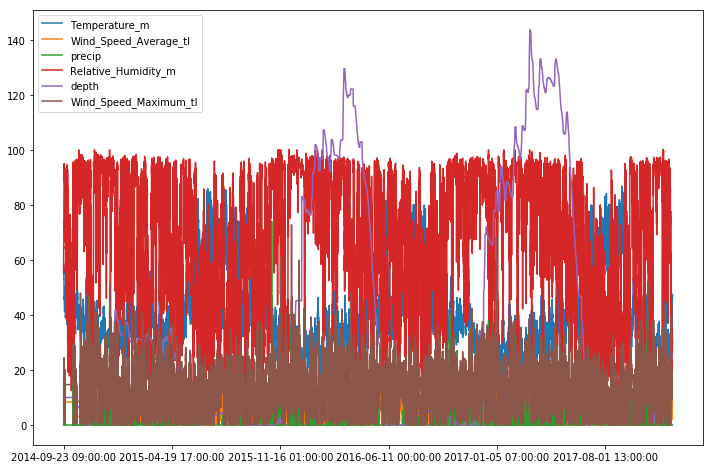

In [64]:
data.plot(figsize=(12, 8))

In [65]:
print(data.values.shape)
print()
print(data.count())
# ok so: y is 9910 samples; these samples correspond to timestamps from a subset of the data
print()
print(len(data[~y_all.isna()]), '= number of data corresponding to y_ok')
print()
print(data.loc[y_ok.index[0]])

(28096, 6)

Temperature_m            28096
Wind_Speed_Average_tl    28096
precip                   28096
Relative_Humidity_m      28096
depth                    28096
Wind_Speed_Maximum_tl    28096
dtype: int64

9911 = number of data corresponding to y_ok

Temperature_m            32.68
Wind_Speed_Average_tl    10.24
precip                   17.00
Relative_Humidity_m      96.70
depth                     9.53
Wind_Speed_Maximum_tl    21.14
Name: 2014-12-20 12:00:00, dtype: float64


In [66]:
# find i | x[i] matches index of y[j]
# only have to run it once!

dicty = {}    # map from .iloc index of y: corresponding .iloc index of data

lower_limit = 0
for i in range(len(y_ok)):
    for j in range(lower_limit, len(data)):
        if data.index[j] == y_ok.index[i]:
            dicty[i] = j
            lower_limit = j
            break

In [67]:
dicty[0]

2115

In [68]:
data.values.shape

(28096, 6)

In [69]:
y = y_ok
X = data[~y_all.isna()].values

print(y.shape)
print(X.shape)

(9911,)
(9911, 6)


In [70]:
X_train = X[:-2000]
y_train = y[:-2000]

X_test = X[-2000:]
y_test = y[-2000:]

One idea:

Use point estimates



In [72]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.preprocessing import scale

rf = RF(n_estimators=30, n_jobs=-1, max_features=6, max_depth=10)

In [73]:
# fit each RF to a series (X predict y_train: 0.0...1.0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [74]:
rf.score(X_train, y_train)

0.79253598287957772

In [75]:
rf.score(X_test, y_test)

-0.19971894375734253

In [51]:
X[0]

array([ 32.68,  10.24,  17.  ,  96.7 ])